##  Project 5 Vehicle Detection and Tracking


In [1]:
import numpy as np
import cv2, glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from tool_functions import *
#%matplotlib qt
%matplotlib inline


cell passed.


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# import params
# ### TODO: Tweak these parameters and see how the results change.
# #color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
# #color_space = 'HSV'
# color_space = 'HLS'

# orient = 9  # HOG orientations

# #pix_per_cell = 8 # HOG pixels per cell
# # making it 4 to have more rect in find_cars 
# pix_per_cell = 4 # HOG pixels per cell

# cell_per_block = 2 # HOG cells per block

# hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
# #spatial_size = (16, 16) # Spatial binning dimensions
# spatial_size = (16, 16) # Spatial binning dimensions

# #hist_bins = 16    # Number of histogram bins
# hist_bins = 16    # Number of histogram bins

# spatial_feat = True # Spatial features on or off
# hist_feat = True # Histogram features on or off
# hog_feat = True # HOG features on or off
# y_start_stop = [None, None] # Min and max in y to search in slide_window()

# # global variables:
# X_scaler = None


In [3]:
import params
### TODO: Tweak these parameters and see how the results change.
#color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
#color_space = 'HSV'
color_space = params.color_space
# HOG orientations
orient = params.orient
pix_per_cell = params.pix_per_cell     # HOG pixels per cell
cell_per_block = params.cell_per_block # HOG cells per block
hog_channel = params.hog_channel # Can be 0, 1, 2, or "ALL"
spatial_size = params.spatial_size # Spatial binning dimensions
hist_bins = params.hist_bins    # Number of histogram bins

spatial_feat = params.spatial_feat # Spatial features on or off
hist_feat = params.hist_feat # Histogram features on or off
hog_feat = params.hog_feat # HOG features on or off
y_start_stop = params.y_start_stop # Min and max in y to search in slide_window()

# test on findcars.
# ystart = 400
ystart = 350
ystop = 656
scale = 1.5

# global variables:
X_scaler = None


In [4]:
from pathlib import Path

clf_file = Path("save/clf.pickle")
scaler_file = Path("save/x_scaler.pickle")
if clf_file.is_file() & scaler_file.is_file():
    print(clf_file,  "exist! Don't train classifier, just load it.")
    with open('save/clf.pickle', 'rb') as f:
        clf2 = pickle.load(f)
        print(clf2)    
    with open('save/x_scaler.pickle', 'rb') as f:
        global X_scaler
        X_scaler = pickle.load(f)
else:
    print(" One or more model files not exist, start training classifier...")
    clf2 = train_classifier()

print('cell passed.')

/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


 One or more model files not exist, start training classifier...
cars size :  8792
notcars size :  8968
after sampled: 
cars size :  4000
notcars size :  4000
elapsed_time :  0.06791281700134277
car_features shape:,  4000
X:,  (8000, 11400)  X_scaler:  StandardScaler(copy=True, with_mean=True, with_std=True)
Using: 18 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 11400
3.08 Seconds to train SVC...
Test Accuracy of SVC =  0.9838
elapsed_time :  61.630106687545776
cell passed.


elapsed_time :  0.08438587188720703


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


in draw_boxes
type params : <class 'module'> params : <module 'params' from '/home/pachinko/codes/udacity/p5-carnd-vehicle-detection/params.py'>
orient : 18


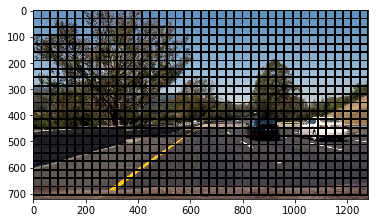

in draw_boxes
type params : <class 'module'> params : <module 'params' from '/home/pachinko/codes/udacity/p5-carnd-vehicle-detection/params.py'>
orient : 18


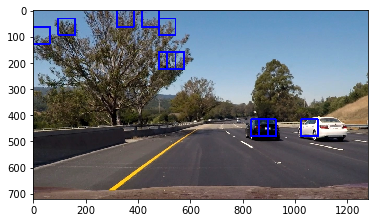

elapsed_time :  6.60371470451355
cell passed.


In [5]:
import numpy as np
import cv2, glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from tool_functions import *

#%matplotlib qt
%matplotlib inline
start_time = time.time()

image = mpimg.imread('test_images/test6.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))
# windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
#                     xy_window=(48, 48), xy_overlap=(0.5, 0.5))
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5))

elapsed_time = time.time() - start_time
print('elapsed_time : ', elapsed_time )

hot_windows = search_windows(image, windows, clf2, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel
                        ,spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat
                            )

window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)
plt.show()

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)
plt.show()

elapsed_time = time.time() - start_time
print('elapsed_time : ', elapsed_time )

print('cell passed.')

images :  ['test_images/test2.jpg', 'test_images/test5.jpg', 'test_images/test6.jpg', 'test_images/test1.jpg', 'test_images/test3.jpg', 'test_images/test4.jpg']


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


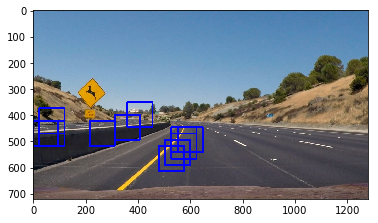

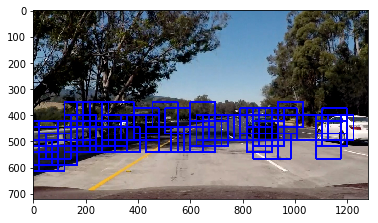

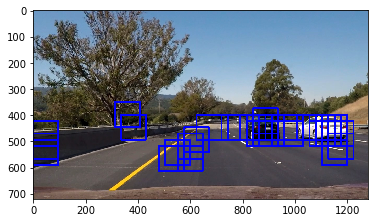

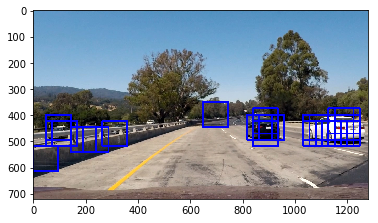

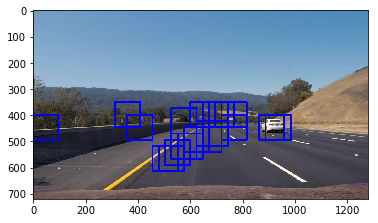

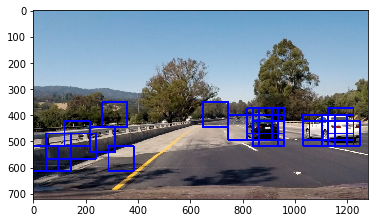

cell passed.


In [6]:

filenames = glob.glob('test_images/*.jpg')
print('images : ', filenames)
for filename in filenames:
    img = mpimg.imread(filename)
    out_img, rect = find_cars(img, ystart, ystop, scale, clf2, X_scaler, orient, 
                              pix_per_cell, cell_per_block, spatial_size, hist_bins)

    plt.imshow(out_img)
    plt.show()
print('cell passed.')

images :  ['test_images/test2.jpg', 'test_images/test5.jpg', 'test_images/test6.jpg', 'test_images/test1.jpg', 'test_images/test3.jpg', 'test_images/test4.jpg']


/home/pachinko/anaconda3/envs/py35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


bbox_list len:  11
2 cars found


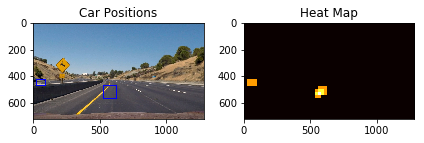

bbox_list len:  70
5 cars found


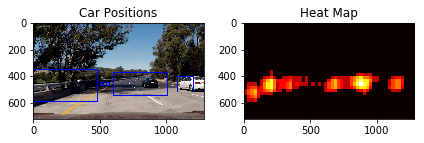

bbox_list len:  35
5 cars found


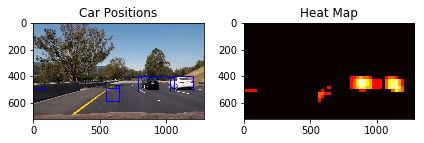

bbox_list len:  25
3 cars found


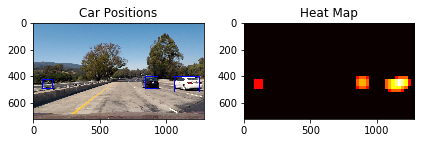

bbox_list len:  20
1 cars found


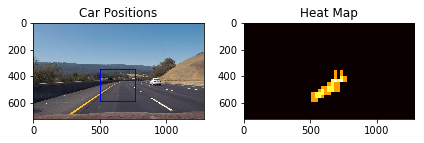

bbox_list len:  27
3 cars found


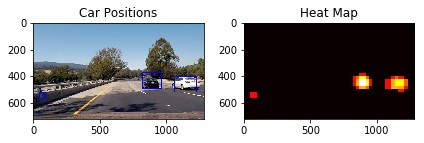

cell passed.


In [7]:
# testing on def makeheatmap.
filenames = glob.glob('test_images/*.jpg')
print('images : ', filenames)
for filename in filenames:
    img = mpimg.imread(filename)
    out_img, rect = find_cars(img, ystart, ystop, scale, clf2, X_scaler, orient, 
                              pix_per_cell, cell_per_block, spatial_size, hist_bins)

    heatmap_threshold = 2
    heat_img = makeheatmap(img, rect, heatmap_threshold, True)
#     plt.imshow(heat_img)
#     plt.show()

print('cell passed.')
    

In [8]:
#interrupt

In [ ]:
def process_one_image(img, debug = False):
    out_img, rect = find_cars(img, ystart, ystop, scale, clf2, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
#     heatmap_threshold = 2
    heat_img = makeheatmap(img, rect, heatmap_threshold, debug)
    return heat_img

def process_image(image, debug = False):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    # turn on debug to produce some image, for debugging or the writeups.
    debug = False
    debug = True
    return process_one_image(image, debug)


bbox_list len:  30
4 cars found


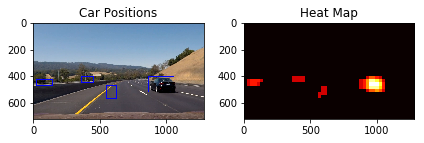

[MoviePy] >>>> Building video test_videos_output/project-output.mp4
[MoviePy] Writing video test_videos_output/project-output.mp4


  0%|          | 0/101 [00:00<?, ?it/s]

bbox_list len:  30
4 cars found


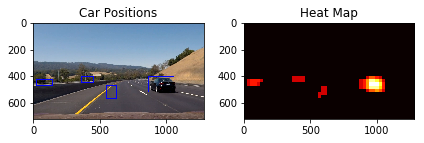

  1%|          | 1/101 [00:01<01:47,  1.08s/it]

bbox_list len:  22
2 cars found


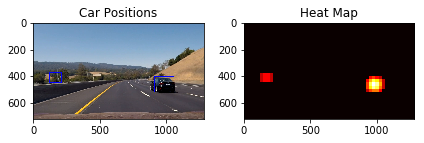

  2%|▏         | 2/101 [00:02<01:48,  1.09s/it]

bbox_list len:  28
3 cars found


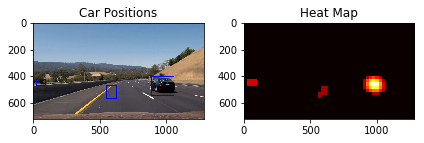

  3%|▎         | 3/101 [00:03<01:42,  1.04s/it]

bbox_list len:  21
2 cars found


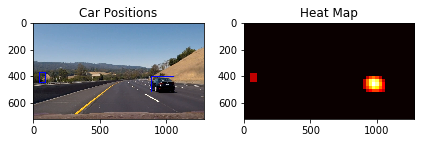

  4%|▍         | 4/101 [00:04<01:41,  1.04s/it]

bbox_list len:  21
2 cars found


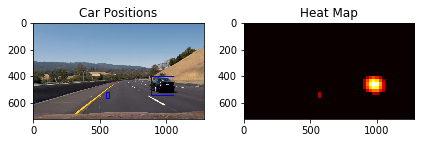

  5%|▍         | 5/101 [00:05<01:39,  1.04s/it]

bbox_list len:  21
2 cars found


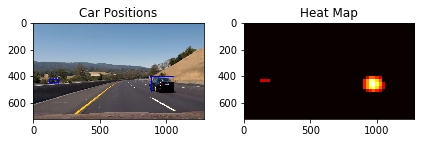

  6%|▌         | 6/101 [00:06<01:38,  1.04s/it]

bbox_list len:  22
1 cars found


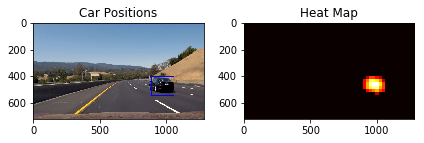

  7%|▋         | 7/101 [00:07<01:41,  1.08s/it]

bbox_list len:  21
2 cars found


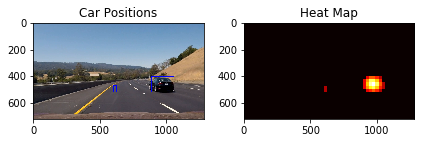

  8%|▊         | 8/101 [00:08<01:39,  1.07s/it]

bbox_list len:  21
2 cars found


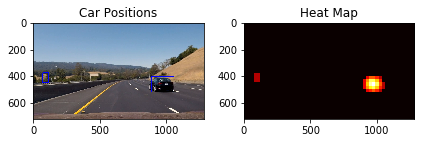

  9%|▉         | 9/101 [00:09<01:32,  1.00s/it]

bbox_list len:  21
2 cars found


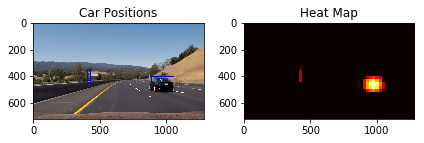

 10%|▉         | 10/101 [00:10<01:27,  1.04it/s]

bbox_list len:  23
2 cars found


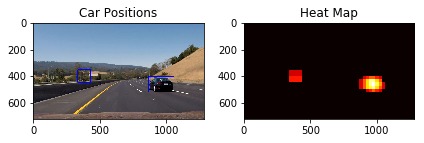

 11%|█         | 11/101 [00:11<01:25,  1.05it/s]

bbox_list len:  21
2 cars found


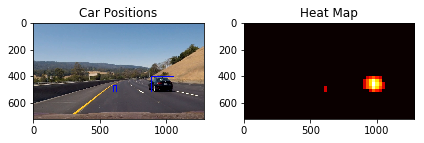

 12%|█▏        | 12/101 [00:12<01:28,  1.00it/s]

bbox_list len:  17
1 cars found


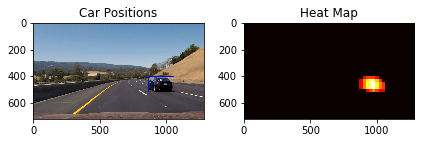

 13%|█▎        | 13/101 [00:13<01:23,  1.05it/s]

bbox_list len:  18
2 cars found


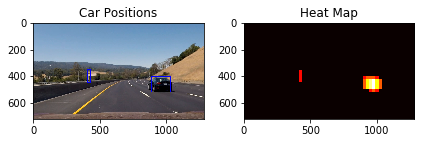

 14%|█▍        | 14/101 [00:14<01:24,  1.03it/s]

bbox_list len:  19
3 cars found


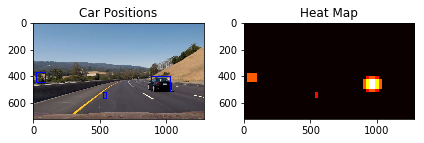

 15%|█▍        | 15/101 [00:15<01:25,  1.00it/s]

bbox_list len:  20
2 cars found


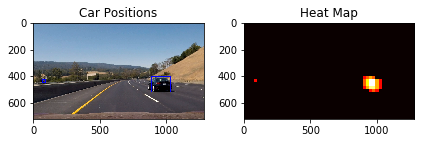

 16%|█▌        | 16/101 [00:16<01:22,  1.03it/s]

bbox_list len:  22
2 cars found


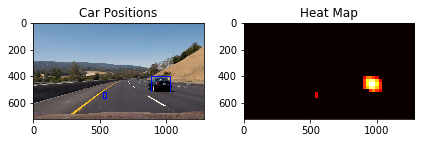

 17%|█▋        | 17/101 [00:16<01:20,  1.04it/s]

bbox_list len:  22
3 cars found


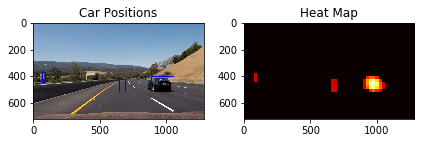

 18%|█▊        | 18/101 [00:17<01:20,  1.04it/s]

bbox_list len:  22
2 cars found


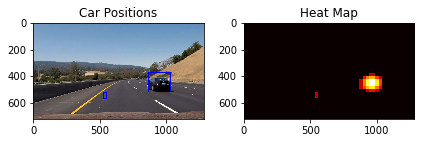

 19%|█▉        | 19/101 [00:19<01:24,  1.03s/it]

bbox_list len:  20
2 cars found


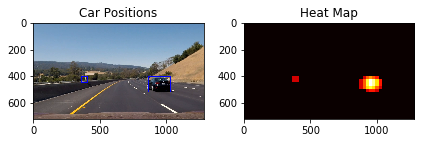

 20%|█▉        | 20/101 [00:20<01:26,  1.07s/it]

bbox_list len:  20
1 cars found


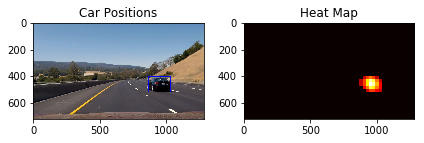

 21%|██        | 21/101 [00:21<01:22,  1.03s/it]

bbox_list len:  22
2 cars found


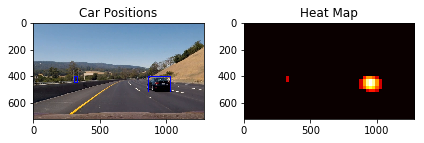

 22%|██▏       | 22/101 [00:22<01:21,  1.03s/it]

bbox_list len:  26
3 cars found


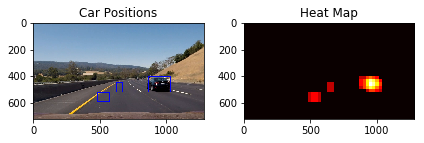

 23%|██▎       | 23/101 [00:23<01:22,  1.06s/it]

bbox_list len:  19
2 cars found


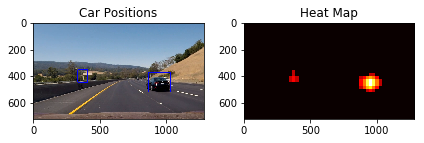

 24%|██▍       | 24/101 [00:24<01:21,  1.05s/it]

bbox_list len:  21
2 cars found


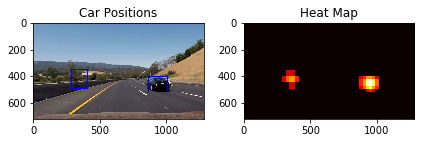

 25%|██▍       | 25/101 [00:25<01:25,  1.13s/it]

bbox_list len:  22
2 cars found


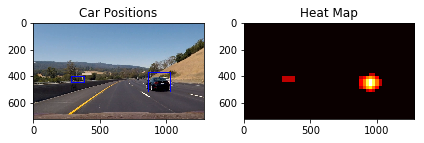

 26%|██▌       | 26/101 [00:26<01:25,  1.14s/it]

bbox_list len:  21
1 cars found


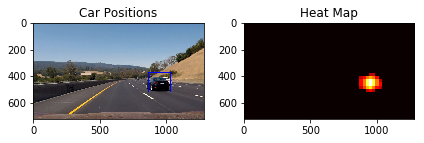

 27%|██▋       | 27/101 [00:28<01:24,  1.14s/it]

bbox_list len:  24
3 cars found


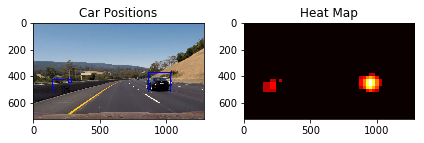

 28%|██▊       | 28/101 [00:28<01:17,  1.07s/it]

bbox_list len:  20
1 cars found


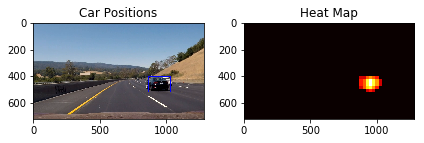

 29%|██▊       | 29/101 [00:30<01:19,  1.10s/it]

bbox_list len:  23
5 cars found


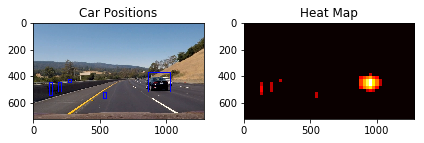

 30%|██▉       | 30/101 [00:31<01:15,  1.06s/it]

bbox_list len:  23
2 cars found


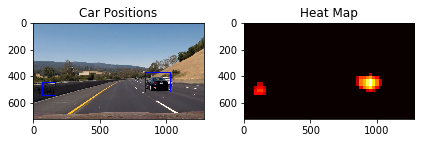

 31%|███       | 31/101 [00:32<01:12,  1.03s/it]

bbox_list len:  30
4 cars found


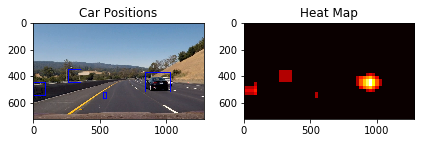

 32%|███▏      | 32/101 [00:33<01:14,  1.08s/it]

In [ ]:
# make sure the output folder exist.
import os
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

outputdir = 'test_videos_output'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
    
white_output = outputdir + '/project-output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4").subclip(33, 37)
#clip1 = VideoFileClip("project_video.mp4").subclip(39,43)
#clip1 = VideoFileClip("project_video.mp4")

#clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)



In [ ]:
interrupt

In [ ]:
# make sure the output folder exist.
import os
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

outputdir = 'test_videos_output'
if not os.path.exists(outputdir):
    os.makedirs(outputdir)
    
white_output = outputdir + '/project-output-full.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4")#.subclip(33, 37)
#clip1 = VideoFileClip("project_video.mp4").subclip(39,43)
#clip1 = VideoFileClip("project_video.mp4")

#clip1 = VideoFileClip("challenge_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

